### โค้ดไพทอนประกอบบทที่ 2 ของหนังสือ 
### "การโปรแกรมไพทอนสำหรับงานควบคุมและฝังตัว"
### ดร.วโรดม ตู้จินดา

<a href="https://colab.research.google.com/github/dewdotninja/py4conemb/blob/master/code/chapter2/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## หากรันใน colab หรือยังไม่มีไลบรารี Python control library  ต้องติดตั้งก่อนโดยรันเซลล์นี้
!pip install control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [5]:
Vs = 5
R1 = R2 = R3 = 1000
Rx_min = 800
Rx_max = 1200

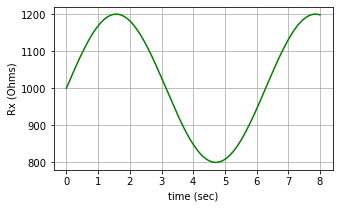

In [10]:
tvec = np.arange(0,8,0.001)
Rx_range = Rx_max - Rx_min
Rx_variation = 0.5*Rx_range*np.sin(tvec) + Rx_min+0.5*Rx_range
plt.figure(figsize=(5,3))
plt.plot(tvec,Rx_variation,'g-')
plt.grid(True)
plt.xlabel('time (sec)')
plt.ylabel('Rx (Ohms)')
plt.show()


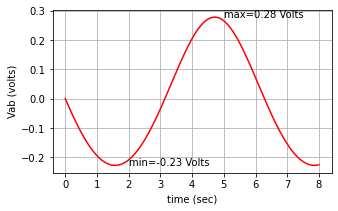

In [13]:
Va = 2.5 # since R1 = R2 --> Va = Vs/2
Vb = (Rx_variation/(R3+Rx_variation))*Vs
Vab = Va - Vb
Vab_min = min(Vab) # find minimum and maximum
Vab_max = max(Vab)
Vab_min_txt = "min={:.2f} Volts".format(Vab_min)
Vab_max_txt = "max={:.2f} Volts".format(Vab_max)
plt.figure(figsize=(5,3))
plt.plot(tvec,Vab,'r-')
plt.grid(True)
plt.xlabel('time (sec)')
plt.ylabel('Vab (volts)')
plt.text(2,Vab_min, Vab_min_txt) # show min/max on graph
plt.text(5,Vab_max, Vab_max_txt)
plt.show()

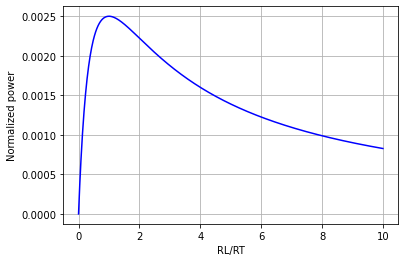

In [4]:
RT = 100
RL = np.arange(0,1000)
n_power = RL/(RL+RT)**2
plt.figure()
plt.plot(RL/RT,n_power,'b-')
plt.xlabel('RL/RT')
plt.ylabel('Normalized power')
plt.grid(True)
plt.show()

In [ ]:
# Ex 2.3

In [2]:
I_sat = 1e-12
kt_q = 0.0259
R_T = 22
V_T = 12

In [6]:
v_vec = np.arange(0,0.75,0.01)

In [7]:
i_LL = -(1/R_T)*v_vec + V_T/R_T

In [8]:
i_D = I_sat*(np.exp(v_vec/kt_q)-1)

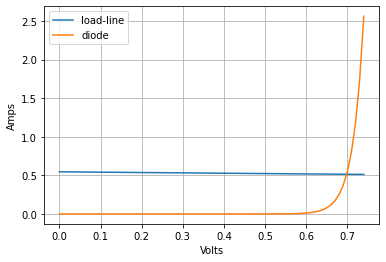

In [9]:
plt.figure()
plt.plot(v_vec,i_LL)
plt.plot(v_vec,i_D)
plt.xlabel("Volts")
plt.ylabel("Amps")
plt.grid(True)
plt.legend(["load-line","diode"])
plt.show()

In [ ]:
# numerical method

In [3]:
v_D1 = V_T/2
v_D2 = V_T

In [4]:
# initialize i_D1, i_D2 to any unequal numbers
i_D1 = 1
i_D2 = 2

In [5]:
# how to solve it
while abs(i_D1 - i_D2)>1e-6:
    i_D1 = (V_T - v_D1)/R_T
    i_D2 = I_sat*(np.exp(v_D1/kt_q)-1)
    if i_D1 > i_D2:
        v_D1 = v_D1 + 0.5*(v_D2 - v_D1)
    elif i_D2> i_D1:
        v_D2 = v_D1
        v_D1 = 0.5*v_D1
    
print("id = {}".format(i_D1))
print("vd = {}".format(v_D2))

id = 0.5137094761468344
vd = 0.6983915247696434


In [9]:
R = 100
C = 1000e-6
L = 5e-3
s = ctl.tf('s')
H = 1/(L*C*s**2+R*C*s+1)
H

TransferFunction(array([1]), array([5.e-06, 1.e-01, 1.e+00]))

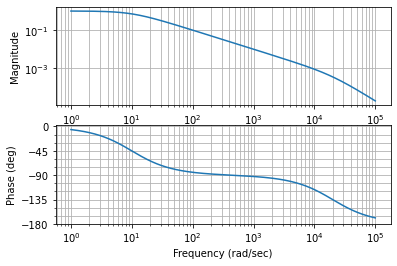

In [10]:
_,_,_ =ctl.bode(H)

In [ ]:
# ex 2.6

In [37]:
wo = 20*np.pi
C = 1e-6 
R = 1/(wo*C)
R

15915.494309189537

In [39]:
R = 16000
s = ctl.tf('s')
H = 1/(R*C*s+1)
H

TransferFunction(array([1]), array([0.016, 1.   ]))

In [40]:
fb = 5 # Hz. base frequency
wb = 2*np.pi*fb
fn = 60 # Hz. noise frequency
wn = 2*np.pi*fn
tvec = np.arange(0,1,0.00001)
uvec = np.sin(wb*tvec) + 0.2*np.sin(wn*tvec)  # input is base signal plus noise

Text(0.5, 1.0, 'Input')

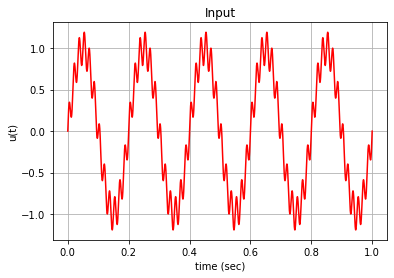

In [41]:
plt.figure()
plt.plot(tvec,uvec,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('u(t)')
plt.title('Input')

In [42]:
t, yvec = ctl.forced_response(H, tvec, uvec)

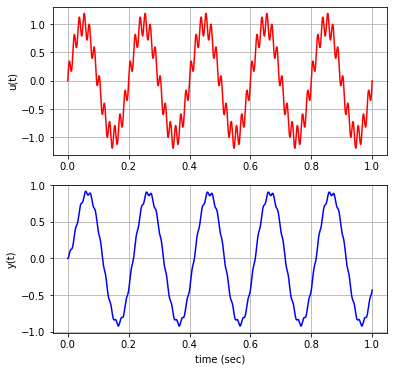

In [45]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,6))
ax1.plot(tvec,uvec,'r-')
ax1.grid(True)
ax1.set_ylabel('u(t)')
ax2.plot(tvec,yvec,'b-')
ax2.set_ylabel('y(t)')
ax2.set_xlabel('time (sec)')
ax2.grid(True)

In [ ]:
# ex 2.7 PWM generation

In [1]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [2]:
ts = 10/256
ts

0.0390625

In [3]:
f = 0.5
tvec = np.arange(0,10,0.00004) 
sig_mag = 250/2
xvec = sig_mag*np.sin(2*np.pi*f*tvec) + sig_mag

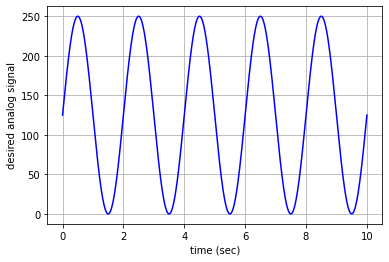

In [6]:
plt.figure()
plt.plot(tvec,xvec,'b-')
plt.xlabel('time (sec)')
plt.ylabel('desired analog signal')
plt.grid('True')
plt.show()

In [7]:
def create_sawtooth(max_val, length):
    st_vec = np.zeros((length,1))
    current_val = 0
    for i in range(length):
        st_vec[i,0] = current_val
        current_val += 1
        if current_val > 255:
            current_val = 0
    
    return st_vec
    

In [8]:
st_vec = create_sawtooth(255, tvec.shape[0])

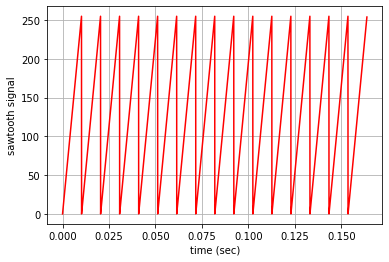

In [9]:
plt.figure()
plt.plot(tvec[0:4095],st_vec[0:4095],'r-')
plt.xlabel('time (sec)')
plt.ylabel('sawtooth signal')
plt.grid('True')
plt.show()

In [10]:
def gen_PWM(analog,sawtooth):
    length = analog.shape[0]
    pwm_vec = np.zeros(length)
    for i in range(length):
        if analog[i]>= sawtooth[i]:
            pwm_vec[i] = 1
        else:
            pwm_vec[i] = 0
    return pwm_vec

In [11]:
pwm_vec = gen_PWM(xvec,st_vec)

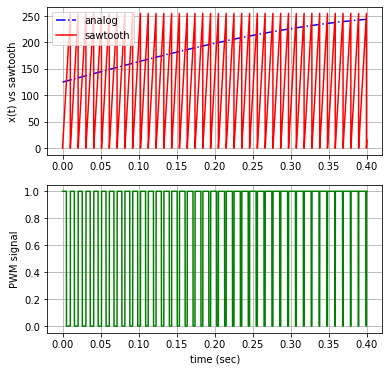

In [15]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,6))
ax1.plot(tvec[0:10000],xvec[0:10000],'b-.',tvec[0:10000],st_vec[0:10000],'r-')
ax1.grid(True)
ax1.legend(['analog','sawtooth'])
ax1.set_ylabel('x(t) vs sawtooth')
ax2.plot(tvec[0:10000],pwm_vec[0:10000],'g-')
ax2.grid(True)
ax2.set_xlabel('time (sec)')
ax2.set_ylabel('PWM signal')
plt.show()

In [16]:
F_o = 5
W_o = 2*np.pi*F_o
C = 1e-6  # 1 uF
R = 1/(W_o*C)
R
print("R = "+str(round(R))+" Ohms and C = "+str(C)+" Farad yields cutoff frequency of "+str(F_o)+" Hz")

R = 31831 Ohms and C = 1e-06 Farad yields cutoff frequency of 5 Hz


In [17]:
R = 32000 # practical value
s = ctl.tf("s")
H = 1/(R*C*s+1)
H

TransferFunction(array([1]), array([0.032, 1.   ]))

In [18]:
t, yvec = ctl.forced_response(H, tvec, pwm_vec)

In [20]:
yvec_a = 250*yvec 

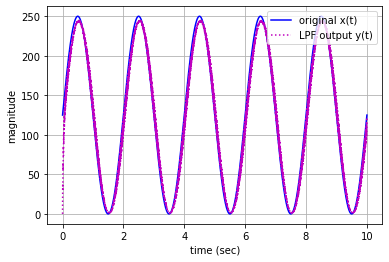

In [21]:
plt.figure()
plt.plot(tvec,xvec,'b-',t,yvec_a,'m:')
plt.xlabel('time (sec)')
plt.ylabel('magnitude')
plt.grid(True)
plt.legend(["original x(t)","LPF output y(t)"],loc=1)
plt.show()

In [ ]:
# exercise 2.8

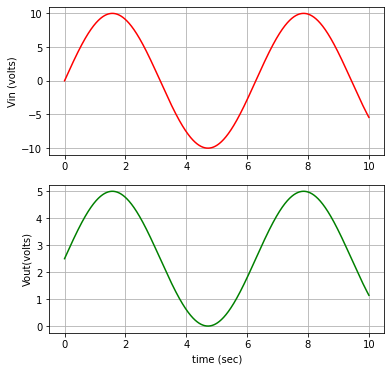

In [4]:
R1 = R2 = R4 = 10000
R3 = 70000
Vb = -2.5
tvec = np.arange(0,10,0.001)
Vin = 10*np.sin(tvec)
Vout_inv = -(R2/R1)*Vb
Vout_ninv = (R4/(R3+R4))*(1+R2/R1)*Vin
Vout = Vout_inv + Vout_ninv
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,6))
ax1.plot(tvec,Vin,'r-')
ax1.grid(True)
ax1.set_ylabel('Vin (volts)')
ax2.plot(tvec,Vout,'g-')
ax2.grid(True)
ax2.set_xlabel('time (sec)')
ax2.set_ylabel('Vout(volts)')
plt.show()

In [ ]:
# Ex 2.10

In [2]:
def level_shifter_design(vi_min, vi_max, vo_min, vo_max):
    v_id = vi_max - vi_min  # input range
    v_ia = vi_max - 0.5*v_id  # average of input
    v_od = vo_max - vo_min  # output range
    v_oa = vo_max - 0.5*v_od # desired avearge of output
    g = v_od/v_id  # desired amplification/attenuation
    
    if g > 1: # case A : amplification
        print("Case A : amplification")
        k = g - 1  # k = R2/R1
        rho = 1
        R4 = 10e6  # high value to make sure input impedance remains high
        R3 = 0     # This means voltage divider is just a pass through (2)
        R1 = 10000  # choose a practical value for R1 
        R2 = k*R1   # solve for R2 using (3)
        v_om = g*v_ia  # middle level of output without V_B
        VB = (v_om - v_oa)/k  # compute V_B to achieve required offset
    else: # case B : attenuation
        print("Case B : attenuation")
        k = 1   # i.e., R1 = R2
        R1 = 10000  # choose practical values
        R2 = 10000
        rho = 0.5*g 
        R3 = 10000  # choose practical value for R3
        R4 = R3*rho/(1+rho)  # solve for R4 using (6)
        v_om = g*v_ia  # middle level of output without V_B
        VB = v_om - v_oa  # (7)
   
    # plot input and output to verify the design
    tvec = np.arange(0,1,0.01)
    w = 10
    Vin = 0.5*v_id*np.sin(w*tvec)+v_ia
    Vout = rho*(1+k)*Vin - k*VB  #(1)    
    Vin_min = min(Vin)  # print values on graph for easy verification    
    Vin_min_txt = "min={:.2f} Volts".format(Vin_min)
    Vin_max = max(Vin)
    Vin_max_txt = "max={:.2f} Volts".format(Vin_max)
    Vout_min = min(Vout)
    Vout_min_txt = "min={:.2f} Volts".format(Vout_min)
    Vout_max = max(Vout)
    Vout_max_txt = "max={:.2f} Volts".format(Vout_max)
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(8,8))
    fig.suptitle('Level shifter design verification')
    ax1.plot(tvec,Vin,'b-')
    ax1.grid(True)
    ax1.set_ylabel('$V_{in}(t)$')
    ax1.text(0.52,Vin_min,Vin_min_txt)
    ax1.text(0.2,Vin_max,Vin_max_txt)
    
    ax2.plot(tvec,Vout,'r-')
    ax2.set_xlabel('time (s)')
    ax2.set_ylabel('$V_{out}(t)$')
    ax2.grid(True)
    ax2.text(0.52,Vout_min,Vout_min_txt)
    ax2.text(0.2,Vout_max,Vout_max_txt)

    print("Design yields R1 = {:.2f}, R2 = {:.2f}, R3 = {:.2f},R4 = {:.2f} Ohms, VB = {:.2f} Volts".format(R1,R2,R3,R4,VB))
    return R1, R2, R3, R4, VB
        

Case B : attenuation
Design yields R1 = 10000.00, R2 = 10000.00, R3 = 10000.00,R4 = 762.12 Ohms, VB = -1.65 Volts


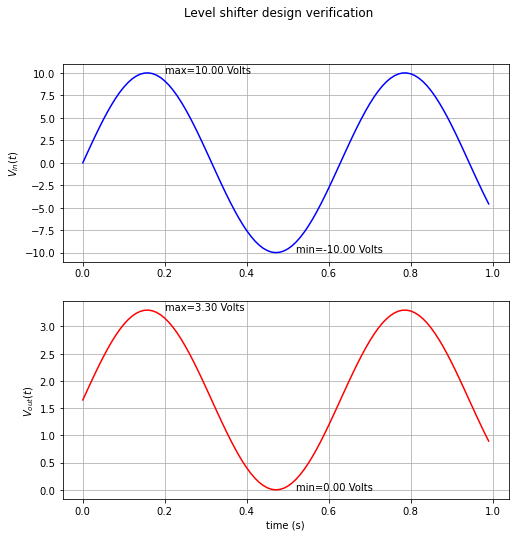

In [7]:
# Test 1 : Vin = [-10,10] V, Vout = [0,3.3] V (Ex. analog input for servo motor to MCU)
R1,R2,R3,R4,VB = level_shifter_design(vi_min = -10,vi_max = 10, vo_min=0, vo_max=3.3)

Case A : amplification
Design yields R1 = 10000.00, R2 = 48823.53, R3 = 0.00,R4 = 10000000.00 Ohms, VB = -0.28 Volts


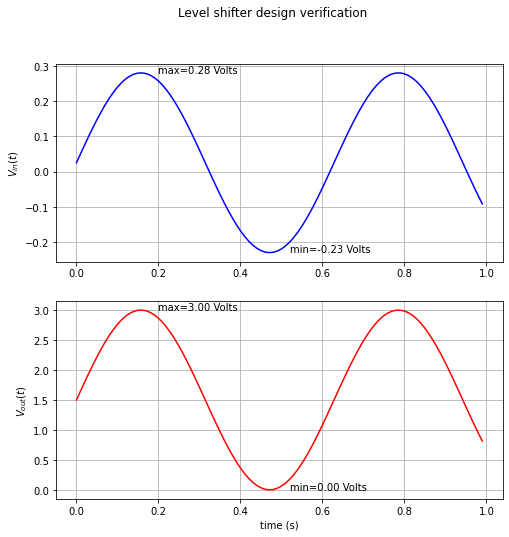

In [3]:
R1,R2,R3,R4,VB = level_shifter_design(vi_min = -0.23,vi_max = 0.28, vo_min=0, vo_max=3)

Test using vi_min = 4.46, vi_max = 7.75, vo_min = -2.64, vo_max = -1.45 volts
Case B : attenuation
Design yields R1 = 10000.00, R2 = 10000.00, R3 = 10000.00,R4 = 1527.57 Ohms, VB = 4.25 Volts


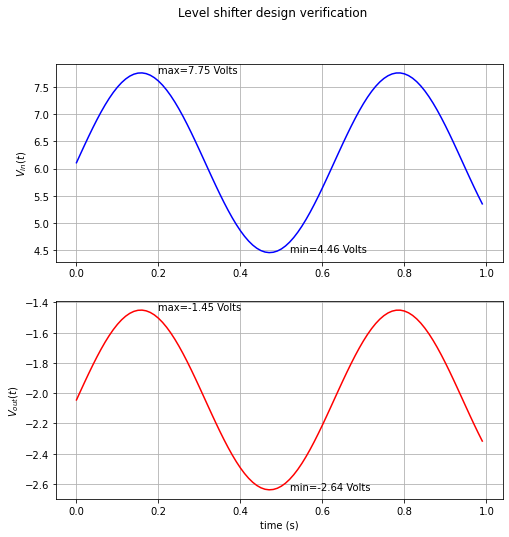

In [5]:
# Test 4 : Vin = [vi_min, vi_max] V, Vout = [vo_min, vo_max] V (random Vin, Vout in the range +/- 10, only require Vmin < Vmax
# for both input and output.)
# Run this cell as often as you like.

# generate random input and output limits
vi_min = 10*(np.random.rand() - np.random.rand())
vi_max = -10
while vi_max < vi_min: # make sure vi_max > vi_min
    vi_max = 10*(np.random.rand() - np.random.rand())

vo_min = 10*(np.random.rand() - np.random.rand())
vo_max = -10
while vo_max < vo_min: # make sure vo_max > vo_min
    vo_max = 10*(np.random.rand() - np.random.rand())
print("Test using vi_min = {:.2f}, vi_max = {:.2f}, vo_min = {:.2f}, vo_max = {:.2f} volts".format(vi_min, vi_max, vo_min, vo_max))


R1,R2,R3,R4,VB = level_shifter_design(vi_min = vi_min,vi_max = vi_max, vo_min=vo_min, vo_max=vo_max)

In [ ]:
# Ex 2.11

In [4]:
F_o = 100
W_o = 2*np.pi*F_o
C = 0.1e-6  # 0.1 uF
R = 1/(W_o*C)
R
print("R = "+str(round(R))+" Ohms and C = "+str(C)+" Farad yields cutoff frequency of "+str(F_o)+" Hz")

R = 15915 Ohms and C = 1e-07 Farad yields cutoff frequency of 100 Hz


In [5]:
R_F = 16000 
C_F = 0.1e-6
R_S = 800
s = ctl.tf("s")
H = -R_F/((R_F*C_F*s+1)*R_S)
H

TransferFunction(array([-16000]), array([  1.28, 800.  ]))

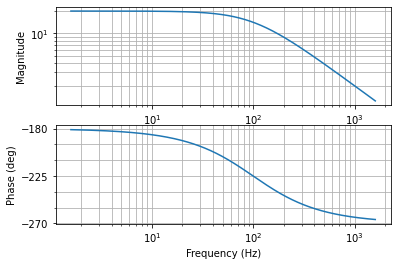

In [7]:
_,_,_=ctl.bode_plot(H,Hz=True)

In [29]:
fd = 10 # Hz. desired frequency
wd = 2*np.pi*fd
tvec = np.arange(0,0.2,0.0002)
uvec = np.sin(wd*tvec) + 0.2*(2*np.random.rand(tvec.shape[0])-1)  
t, yvec = ctl.forced_response(H, tvec, uvec)

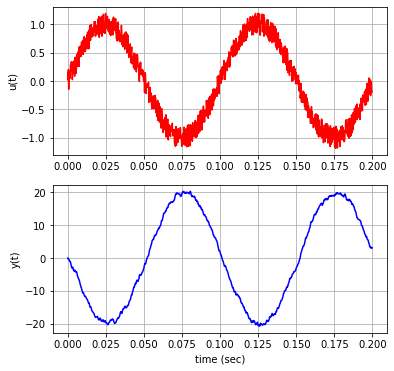

In [30]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(6,6))
ax1.plot(tvec,uvec,'r-')
ax1.grid(True)
ax1.set_ylabel('u(t)')
ax2.plot(tvec,yvec,'b-')
ax2.set_ylabel('y(t)')
ax2.set_xlabel('time (sec)')
ax2.grid(True)

In [10]:
# ex 2.12

(100000,)

In [3]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                    -np.cos(season_time * 2.8 * np.pi),
                    -0.1*np.exp(2.3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1):
    return np.random.randn(len(time)) * noise_level

def plot_series(time, series, format="-", start=0, end=None, label=None,xlabel="time (sec)",ylabel="x(t)"):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

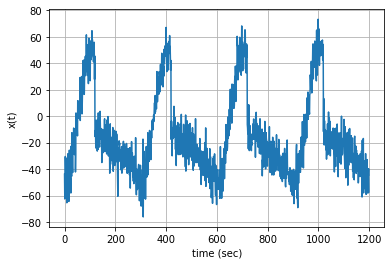

In [9]:
amplitude = 50
period = 300
noise_level = 10
time = np.arange(4 * period)
x_k = seasonality(time, period=period, amplitude=amplitude) + noise(time, noise_level=noise_level)
plot_series(time, x_k)

In [5]:
def sma(x, n=4):
    x_size = x.shape[0]  # find original vector size
    v = np.zeros((x_size,1))
    for k in range(n,x_size):
        v[k,0] = np.mean(x[k-n:k])
    return v

In [10]:
x_sma4 = sma(x_k)
x_sma8 = sma(x_k, n=8)
x_sma12 = sma(x_k, n=12)

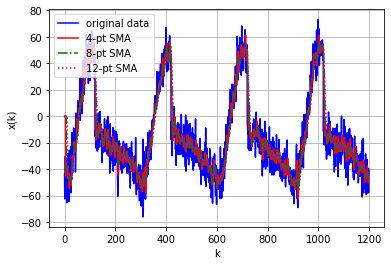

In [11]:
plt.figure()
plt.plot(time,x_k,'b-',time,x_sma4,'r-',time,x_sma8,'g-.',time,x_sma12,'m:')
plt.xlabel("k")
plt.ylabel("x(k)")
plt.legend(["original data","4-pt SMA","8-pt SMA","12-pt SMA"])
plt.grid(True)
plt.show()

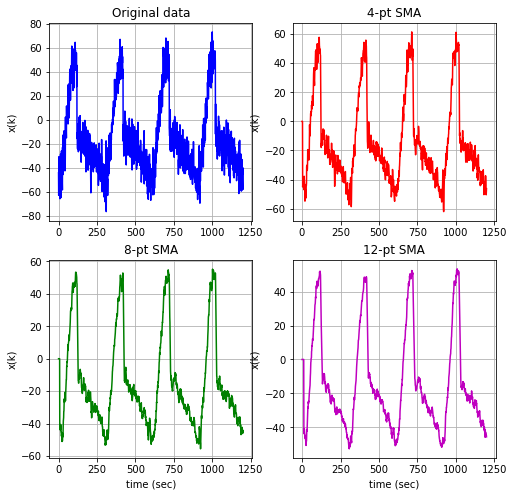

In [12]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0,0].plot(time,x_k,'b-')
axs[0,0].set_ylabel('x(k)')
axs[0,0].set_title('Original data')
axs[0,0].grid(True)
axs[0,1].plot(time,x_sma4,'r-')
axs[0,1].set_ylabel('x(k)')
axs[0,1].set_title('4-pt SMA')
axs[0,1].grid(True)
axs[1,0].plot(time,x_sma8,'g-')
axs[1,0].set_ylabel('x(k)')
axs[1,0].set_xlabel('time (sec)')
axs[1,0].set_title('8-pt SMA')
axs[1,0].grid(True)
axs[1,1].plot(time,x_sma12,'m-')
axs[1,1].set_ylabel('x(k)')
axs[1,1].set_xlabel('time (sec)')
axs[1,1].set_title('12-pt SMA')
axs[1,1].grid(True)
plt.show()

In [ ]:
# ex 2.13

In [13]:
def ewma(x, beta):
    v_size = x.shape[0]
    v = np.zeros((v_size,1))
    for k in range(1,v_size):
        v[k,0] = beta*v[k-1,0] + (1-beta)*x[k]
    return v       

In [14]:
x_ewma1 = ewma(x_k,0.5)
x_ewma2 = ewma(x_k,0.9)
x_ewma3 = ewma(x_k,0.98)

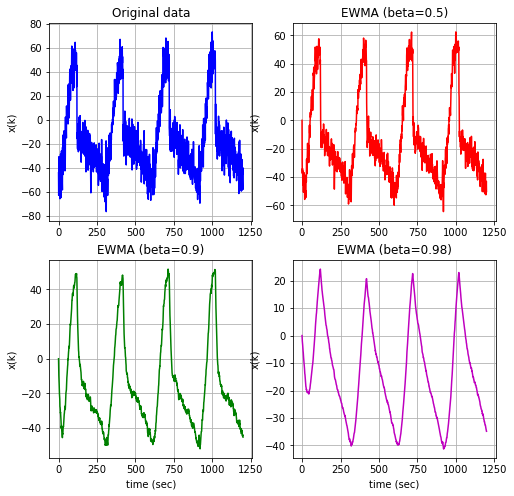

In [15]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0,0].plot(time,x_k,'b-')
axs[0,0].set_ylabel('x(k)')
axs[0,0].set_title('Original data')
axs[0,0].grid(True)
axs[0,1].plot(time,x_ewma1,'r-')
axs[0,1].set_ylabel('x(k)')
axs[0,1].set_title('EWMA (beta=0.5)')
axs[0,1].grid(True)
axs[1,0].plot(time,x_ewma2,'g-')
axs[1,0].set_ylabel('x(k)')
axs[1,0].set_xlabel('time (sec)')
axs[1,0].set_title('EWMA (beta=0.9)')
axs[1,0].grid(True)
axs[1,1].plot(time,x_ewma3,'m-')
axs[1,1].set_ylabel('x(k)')
axs[1,1].set_xlabel('time (sec)')
axs[1,1].set_title('EWMA (beta=0.98)')
axs[1,1].grid(True)
plt.show()